In [240]:
import pandas as pd
from datascience import *
from sympy import *
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use("fivethirtyeight")

We would like to thank Professor Raymond Hawkins for his Economics 100B Problem Set that served as the basis for this assignment.

# Project 1: Modeling Macroeconomic Variables using the Cobb-Douglas Production Function

The goal of this homework is to gain experience the following steps of data science:

1. Downloading and converting raw data files into a format that you can interact with
2. Identifying and visualizing overall trends in the data using a process called Exploratory Data Analysis or EDA
3. Using the data to complete a problem of prediction

We hope that at the end of this, you will see how the skills that you have learned in Data 8 and this class can prepare for dealing with real world datasets, and how you can investigate them to answer questions.

The question you will be answering today is the following: How can we apply the Cobb-Douglas Production Function to understand the different ways countries produce output or GDP?

# Part 1: Getting the data and simplifying the problem

In almost all cases in industry, and later on in this class, you will have to find the dataset that can answer the question that you are trying to solve. However, as we are introducing you to this process, we will be providing the link to such a dataset.

The dataset we will be using today is called "Penn World Table" (PWT) and was compiled by the University of Groningen. It catalogues information on relative levels of income, output, input and productivity for 182 countries between 1950 and 2017.

Your task:
1. Go to: https://www.rug.nl/ggdc/productivity/pwt/ and download the Excel datafile.
2. Open the excel file and convert the "Data" sheet to a .csv file (Comma Seperated Value).
3. Place this file in the same folder as this Notebook.
4. Edit the line ```file_name``` such that it matches the name of the .csv file.
5. Run the code cell below.

In [241]:
### Edit the line below ###
file_name = "pwt91.csv"

### Do not change the line below ###
data = Table().read_table(file_name, engine='python')

Congratulations! You have converted an online dataset into a datatable that you can explore and manipulate in Python! Now, this dataset is saved under the table called ```data```. Look at the first 5 lines below:

In [242]:
data.show(5)

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1951,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1952,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1953,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ABW,Aruba,Aruban Guilder,1954,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


There are a lot of data columns in the table. As we will be using the Cobb-Douglas Production Function, think about what variables are needed in the equation, and which ones we can take from the table. This is an important part of the data science process: understanding the dataset that you are using. Most real-world datasets provide documentation listing the definitions and equations underlying each variable. 

PWT provides this and has identified three variables that will be helpful to us:
1. cn => Capital Stock in millions of USD
2. cgdpe => Expenditure-side Real GDP in millions of USD
3. emp => Number of Persons employed in millions

**Question 1.1. In the cell below list the variables used in the Cobb-Douglas that are missing from the dataset. What does each variable tell about how output is produced?**

**Question 1.2. Remove all columns except for ```cn```, ```rgdpe```, ```emp```, ```country``` and ```year``` from ```data```. Ensure that ```country``` and ```year``` are the two left-most columns. Call the new table ```cleaned_data```.**

In [243]:
### Your code here ###
cleaned_data = data.select("country", "year", "cn", "cgdpe", "emp")

cleaned_data.show(5)

country,year,cn,cgdpe,emp
Aruba,1950,nan,nan,nan
Aruba,1951,nan,nan,nan
Aruba,1952,nan,nan,nan
Aruba,1953,nan,nan,nan
Aruba,1954,nan,nan,nan


Our goal will be to predict what these variables are for each of the countries that we will be examining. From these, we will be able to compare how output is produced in each of these countries. The question is, how can we use the Cobb-Douglas equation to solve for the missing variables? An easy way would be to take the natural log of the equation, making it linear. We can then rewrite the log-linear version of the equation in the slope-intercept format, providing us with ways to quantify $\alpha$ and $A$.

**Question 1.3. In the cell below, using LaTeX, take the natural log of the Cobb-Douglas Production Function. Rewrite in slope-intercept format. Write down your observations about this equation below your work.**

Goal: They see this relationship in the data. Then, they see the intercept to be A and the slope to be $\alpha$.
$$
\ln(Y) = \ln(A) + \alpha \ln(K) + (1 - \alpha) \ln(L) \\
\ln(Y) = \ln(A) + \alpha \left ( \ln(K) - \ln(L) \right ) + \ln(L) \\
\ln \left (\dfrac{Y}{L} \right ) = \ln(A) + \alpha \ln \left ( \dfrac{K}{L} \right )
$$
From there, they can do this for all the countries then compare their values.

# Part 2: Exploring the Data

Now we are going to visualize trends in each of the variables for different countries.

**Question 2.1. Create a table of GDP, Capital Stock and Labor for the USA from 1990 to 2017. Do the same for China and two other countries of your choice. Place all of this data in one table called ```comparison_data```.**

In [244]:
countries = ["Austria", "United States", "China", "Philippines"]
comparison_data = cleaned_data.where("country", are.contained_in(countries)).where("year", are.between(1990, 2017))
comparison_data.show(5)

country,year,cn,cgdpe,emp
Austria,1990,711125,193506,3.56034
Austria,1991,751434,205200,3.59103
Austria,1992,791122,213520,3.59443
Austria,1993,842606,218250,3.57332
Austria,1994,892193,227395,3.58372


**Question 2.2. To help us in later questions, define the function ```country_table_plotter``` that will take in a table of the form ```comparison_data``` and will plot graphs for each country using ```columnX``` and ```columnY```.**

In [245]:
def country_table_plotter(data_table, columnX, columnY):
    # First get a list of all the countries in data_table
    country_list = data_table.group("country").column("country")
    
    # For each country, create a plot of columnX vs. columnY
    for country in country_list:
        curr_data_table = data_table.where("country", country)
        curr_data_table.plot(columnX, columnY)
        plt.title(country)
    return

# How to plot them all on the same axes using datascience library?

**Question 2.3. Produce a plot of time and capital stock for the countries in your table. Make sure that they are all on the same plot, demarcated by a legend. Think about line colors and widths, plot axes, scales and titles. In the markdown cell below, identify differences between the countries and discuss what surprised you.**

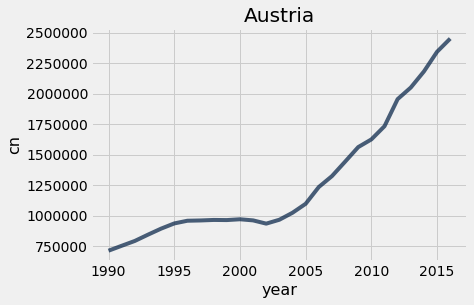

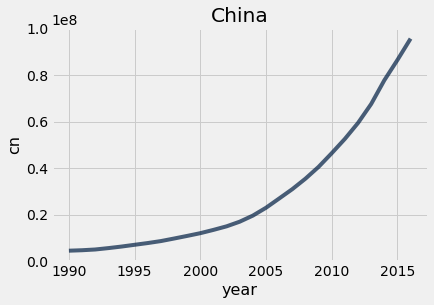

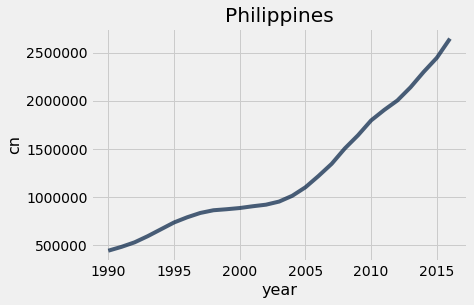

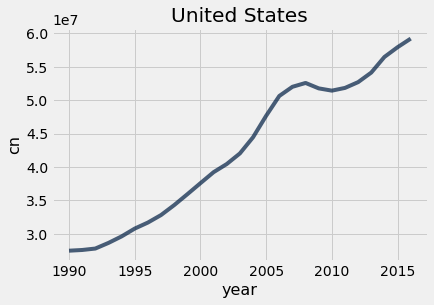

In [246]:
country_table_plotter(comparison_data, "year", "cn")

- United States:

- China:

- Your Country:

- Your Country:

**Question 2.4. Produce a similar plot, but this time of time and labor for the countries in your table. In the markdown cell below, identify differences between the countries and discuss what surprised you.**

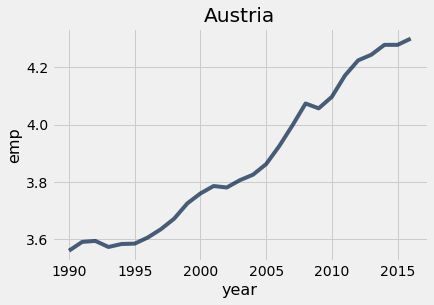

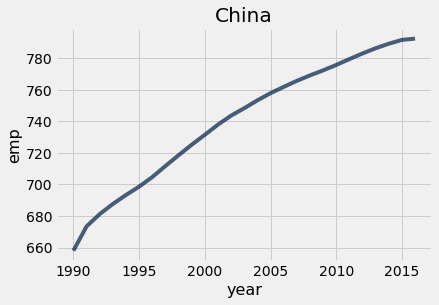

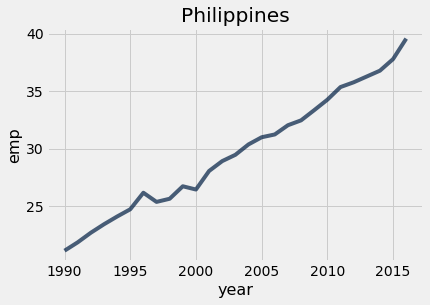

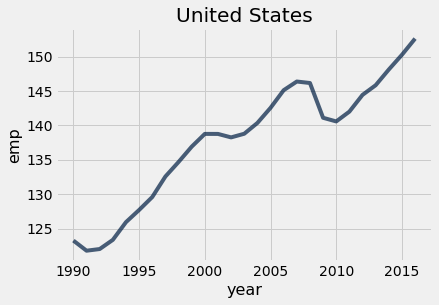

In [247]:
country_table_plotter(comparison_data, "year", "emp")

- United States:

- China:

- Your Country:

- Your Country:

**Question 2.5. Create a plot of time and GDP for the countries in your table. In the markdown cell below, using your knowledge of the Cobb-Douglas Production Function, identify differences between the countries and discuss these in relation to your findings about each of the country's levels of capital stock and labor. Also note about how these have changed over time, if at all.**

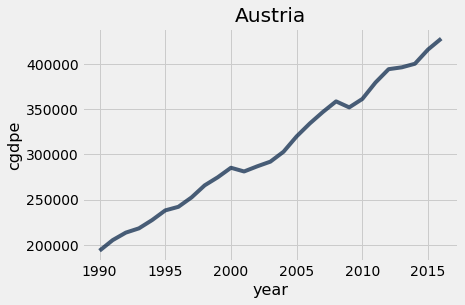

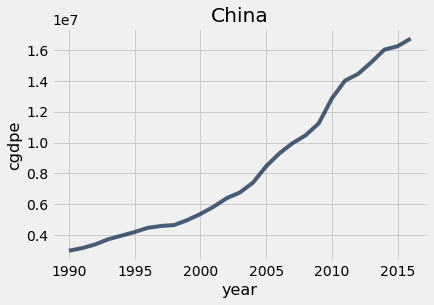

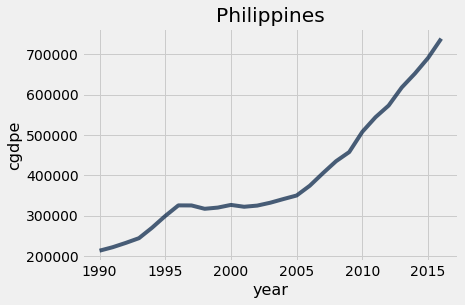

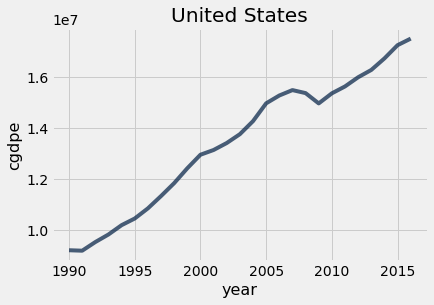

In [248]:
country_table_plotter(comparison_data, "year", "cgdpe")

- United States:

- China:

- Your Country:

- Your Country:

# Part 3: Prediction and Comparison

We are now going to provide numerical backing to your discussions above by predicting values for $\alpha$ and $A$ for each of the 4 countries that we are examining. To do this, we will revisit the equation that you derived in part 1. 

**Question 3.1. A key step in the original paper by Cobb and Douglas was that they converted the data into an index. This is important because the data is measured in different units. Do this for each country and each of the variables. Let the 2011 value be the base year, i.e. 100. Place this in a new table called ```indexed_data``` together with ```country``` and ```year``` columns.**

In [249]:
### Your code here ###
base_values = comparison_data.where("year", 2011)
country_list = base_values.column("country")
indexed_datas = {}
for country in country_list:
    curr_data_country = comparison_data.where("country", country)
    curr_base_values = base_values.where("country", country)
    indexed_datas[country] = Table().with_columns("country", curr_data_country.column("country"),
                                                  "year", curr_data_country.column("year"),
                                                  "Indexed K", curr_data_country.column("cn") / curr_base_values.column("cn") * 100,
                                                  "Indexed Y", curr_data_country.column("cgdpe") / curr_base_values.column("cgdpe") * 100,
                                                  "Indexed L", curr_data_country.column("emp") / curr_base_values.column("emp") * 100
                                                 )

# Joining all into one table
indexed_data = indexed_datas["Austria"].append(indexed_datas["China"]).append(indexed_datas["Philippines"]).append(indexed_datas["United States"])

**Question 3.2. Using the equation you derived in part 1 and the ```indexed_data``` table, calculate the two log ratios that you need to perform linear regression. Place them in the table ```log_ratios``` in the code cell below. Name the columns appropriately.**

In [250]:
### Your code here ###
log_ratios = Table().with_columns("country", indexed_data.column("country"),
                                  "year", indexed_data.column("year"),
                                  "ln(Y/L)", np.log(indexed_data.column("Indexed Y")/indexed_data.column("Indexed L")),
                                  "ln(K/L)", np.log(indexed_data.column("Indexed K")/indexed_data.column("Indexed L")))
log_ratios.show(5)

country,year,ln(Y/L),ln(K/L)
Austria,1990,-0.515516,-0.732332
Austria,1991,-0.465418,-0.685779
Austria,1992,-0.42662,-0.635256
Austria,1993,-0.398821,-0.566319
Austria,1994,-0.360679,-0.512042


**Plot the log ratios for each country from the ```log_ratios``` table below. Think about what should be on your axes and what would be the best type of plot.**

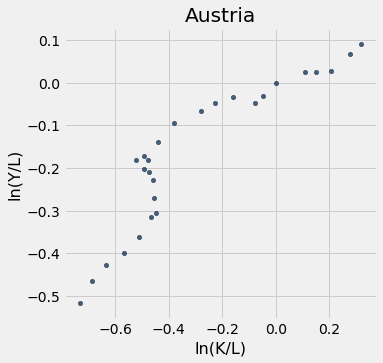

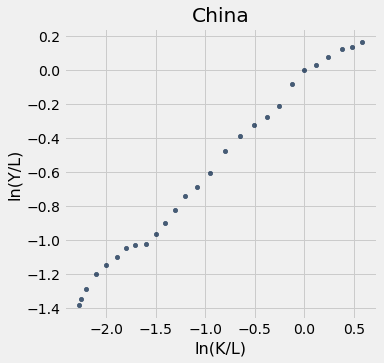

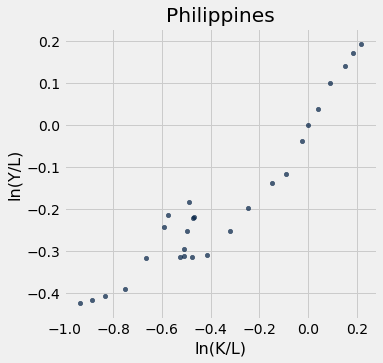

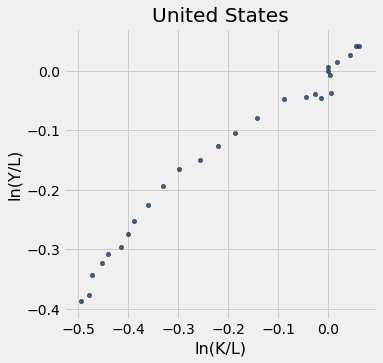

In [251]:
### Your code here ###
def country_table_scatter(data_table, columnX, columnY):
    # First get a list of all the countries in data_table
    country_list = data_table.group("country").column("country")
    
    # For each country, create a plot of columnX vs. columnY
    for country in country_list:
        curr_data_table = data_table.where("country", country)
        curr_data_table.scatter(columnX, columnY)
        plt.title(country)
    return


country_table_scatter(log_ratios, "ln(K/L)", "ln(Y/L)")

**Question 3.3. Perform linear regression to calculate the different $\alpha$ and $A$ values for each country. In the markdown cell below, list out the $\alpha$ and $A$ values for each country.**

# Either provide this part below or they use Data 8 knowledge to find r, then slope and intercept using the regression equations

In [252]:
from sklearn.linear_model import LinearRegression

In [253]:
# This is an involved problem. Think about how you can divide the work by making different functions.
# Hint: What is the equation for linear regression? How do we get the slope and intercept for this equation?

### Your code here ###

model_at = LinearRegression().fit(log_ratios.where("country", "Austria").column("ln(K/L)").reshape(-1, 1),
                              log_ratios.where("country", "Austria").column("ln(Y/L)").reshape(-1, 1))
model_cn = LinearRegression().fit(log_ratios.where("country", "China").column("ln(K/L)").reshape(-1, 1),
                              log_ratios.where("country", "China").column("ln(Y/L)").reshape(-1, 1))
model_ph = LinearRegression().fit(log_ratios.where("country", "Philippines").column("ln(K/L)").reshape(-1, 1),
                              log_ratios.where("country", "Philippines").column("ln(Y/L)").reshape(-1, 1))
model_us = LinearRegression().fit(log_ratios.where("country", "United States").column("ln(K/L)").reshape(-1, 1),
                              log_ratios.where("country", "United States").column("ln(Y/L)").reshape(-1, 1))

In [254]:
print(f"Austria alpha value: {model_at.coef_}")
print(f"China alpha value: {model_cn.coef_}")
print(f"Philippines alpha value: {model_ph.coef_}")
print(f"United States alpha value: {model_us.coef_}")

Austria alpha value: [[0.50611704]]
China alpha value: [[0.55538509]]
Philippines alpha value: [[0.52129992]]
United States alpha value: [[0.6915179]]


In [255]:
print(f"Austria A value: {np.exp(model_at.intercept_)}")
print(f"China A value: {np.exp(model_cn.intercept_)}")
print(f"Philippines A value: {np.exp(model_ph.intercept_)}")
print(f"United States A value: {np.exp(model_us.intercept_)}")

Austria A value: [0.9846097]
China A value: [0.92970855]
Philippines A value: [1.00682545]
United States A value: [0.99953375]


- United States:

- China:

- Your Country:

- Your Country:

**Question 3.4. With reference to the $\alpha$ and $A$ values for each of the countries you have examined, what do they indicate about that country's ability to produce output as measured through GDP? How does the allocation of scare resources as inputs to production differ between them? How about the role of technology or research and development?**

# Congratulations! You've completed the project!